In [1]:
import numpy as np
import matplotlib.pyplot as plt


# v a p r o w a v e

## Задание:

Найти с помощью генетического алгоритма особь, гены которой соответствуют, в формате RGB, фиолетовому цвету (96, 96, 159).

Канонический генетический алгоритм:
- целочисленное кодирование
- все хромосомы в популяции имеют одинаковую длину
- постоянный размер популяции
- рулеточная селекция
- одноточечный оператор кроссинговера
- новое поколение формируется только из особей-потомков

### общая схема:
1. формирование популяции
2. оценивание популяции
3. селекция
4. скрещивание
5. мутация
6. если норм, то конец, иначе идем на пункт 2

In [259]:
class Individ():
    
    def __init__(self, param_len=1):
        # целочисленное кодирование от 0 до 255
        self.params = np.random.randint(255, size=param_len, dtype=np.uint8)
        self.chromosome_len = 8  # 8 bit length of chromosomes
        
    def loss(self, target):
        """ MSE loss """
        mse = (np.square(self.params/255 - target/255)).mean(axis=0)
        return mse
    
    def crossbreeding(self, individ):
        """ Crossbreeding by single point crossover operator."""
        childs = [Individ(param_len=len(self.params)), 
                  Individ(param_len=len(self.params))]
        for i in range(len(self.params)):
            cross_point = np.random.randint(self.chromosome_len)
            
            xx = np.packbits(np.concatenate((np.unpackbits(self.params[i])[:cross_point],
                                             np.unpackbits(individ.params[i])[cross_point:])))
            
            xy = np.packbits(np.concatenate((np.unpackbits(self.params[i])[cross_point:],
                                             np.unpackbits(individ.params[i])[:cross_point])))
            childs[0].params[i] = xx
            childs[1].params[i] = xy
        return childs
    
    def mutate(self, prob_mutate):
        """Mutations."""
        for i in range(len(self.params)):
            chromosomes = np.unpackbits(self.params[i])
#             print("before mutations ", chromosomes)
            for j in range(len(chromosomes)):
                r = np.random.rand()
                if r >= prob_mutate:
                    chromosomes[j] = np.bitwise_and(np.invert(chromosomes[j]), 1)
#             print("after mutations ", chromosomes)
                
        
    

In [260]:
np.random.seed(100) # повторяемость эксперимента

def make_population(individ_count, param_len):
    """ Create population."""
    population = []
    for i in range(individ_count):
        population.append(Individ(param_len=param_len))
    return population

def sort_population(population, target):
    """Method for Truncation Selection."""
    return sorted(population, key=lambda individ: individ.loss(target))

def roulette_selection(population, target, individs_num=None):
    """Roulette Selection in Genetic Algorithms."""
    total_fitness = 0
    for individ in population:
        total_fitness += 1/individ.loss(target)
        
    rel_fitnesses = [1/individ.loss(target) / total_fitness for individ in population]
    # Generate probability intervals for each individual
    probs = [sum(rel_fitnesses[:i + 1]) for i in range(len(rel_fitnesses))]
    
    new_population = []
    
    if individs_num is None:
        individs_num = len(population)
        
    for individ in range(individs_num):
        r = np.random.rand()
        for i, individ in enumerate(population):
            if r <= probs[i]:
                new_population.append(individ)
                break
    return new_population


def crossbreed_population(population, prob_cross):
    """Crossbreeding of individs in population."""
    new_population = []
    for k in range(len(population) // 2):
        i = np.random.randint(len(population))
        j = np.random.randint(len(population))
        if np.random.rand() > prob_cross:
            new_population += (population[i].crossbreeding(population[j]))
        else:
            new_population.append(population[i])
            new_population.append(population[j])
    return new_population
            
def mutate_population(population, prob_mutate):
    """Mutations of individs in population."""
    for individ in population:
        individ.mutate(prob_mutate=prob_mutate)
            

 Iteration:  0  loss:  0.013728053312828397
 Iteration:  10  loss:  0.0001947968729975654
 Iteration:  20  loss:  0.0001947968729975654
 Iteration:  30  loss:  0.0001947968729975654
 Iteration:  40  loss:  0.0001947968729975654
 Iteration:  50  loss:  0.0001947968729975654
 Iteration:  60  loss:  0.0001947968729975654
 Iteration:  70  loss:  0.0001947968729975654
 Iteration:  80  loss:  0.0001947968729975654
 Iteration:  90  loss:  0.0001947968729975654


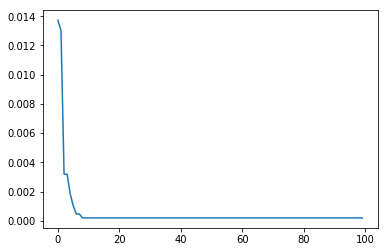

top individ params:  [ 95  95 165]


In [261]:
individ_count = 20 # количество особей
param_len = 3 # количество каналов
prob_cross = 0.2 # вероятность скрещивания
prob_mutate = 0.01 # вероятность мутации

target = np.array([96,96,159], dtype=np.uint8) # целевое значение

# формирование популяции
population = make_population(individ_count, param_len)
loss = []
for i in range(100):
    # селекция
    population = roulette_selection(population, target)
    population = sort_population(population, target)
    # скрещивание
    population = crossbreed_population(population, prob_cross)
    # мутация
    mutate_population(population, prob_mutate)
    
    top_individ = sort_population(population, target)[0]
    loss.append(top_individ.loss(target))
    if i % 10 == 0:
        print(" Iteration: ", i, " loss: ", loss[-1])
    
plt.plot(loss)
plt.show()
print("top individ params: ", top_individ.params)